# Trotter 2 N scaling

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit
from iminuit.cost import LeastSquares  
import time
from core_functions_Trotter import *

# Second order analysis
Fit the scaling laws of the various dependences of the first order additive error and tight error bound to fit functions that depend on the parameters of the system.
## Additive Trotter Error
Use Theorem 1 under the following set of hypothesis: 
- $H = H^N = H_{XY}^N + H_{XZ}^N + H_{YZ}^N \equiv H_1 + H_2 + H_3$ 
- $\Gamma = 3$ (implied by the Hamiltonian decomposition)
- $S(t) = S_2(t) = \prod_{\gamma=1}^{\Gamma} e^{-it H_\gamma/2}\prod_{\gamma=\Gamma}^{1} e^{-it H_\gamma/2}$ $\implies$ $p=2$ order product formula. 
$\implies \left\|\mathcal{A}_2(t, N, \left\{g_{ij}\right\}_{i<j})\right\| = \mathcal{O}(\tilde{\alpha}_\text{comm}(N,\left\{g_{ij}\right\}_{i<j})t^3)$

Define $\mathcal{G} \coloneqq \left\{g_{ij}\right\}_{i<j}$.
Under these assumptions, $\tilde{\alpha}_\text{comm}(N,\left\{g_{ij}\right\}_{i<j})$ takes the following expression:
$$
\begin{split}
\tilde{\alpha}_\text{comm}&=2\Bigl(
       \left\|\left[H_1,\left[H_1,H_2\right]\right]\right\|+\left\|\left[H_1,\left[H_1,H_3\right]\right]\right\|+\left\|\left[H_1,\left[H_2,H_3\right]\right]\right\|+\\
&\quad+\left\|\left[H_2,\left[H_1,H_2\right]\right]\right\|+\left\|\left[H_2,\left[H_1,H_3\right]\right]\right\|+\left\|\left[H_2,\left[H_2,H_3\right]\right]\right\|+\\
&\quad+\left\|\left[H_3,\left[H_1,H_2\right]\right]\right\|+\left\|\left[H_3,\left[H_1,H_3\right]\right]\right\|+\left\|\left[H_3,\left[H_2,H_3\right]\right]\right\|\Bigr)
\end{split}
$$
Write each Hamiltonian explicitly and apply the triangular inequality to write the sum of norms of nested commutators.
$$
\left[A_jA_k+C_jC_k,\left[A_pA_q+C_pC_q,A_mA_n+Z_mZ_n\right]\right]
$$

For a dense gas of neutrinos forming a peaked beam:
$$
g_{ij} = \frac{\mu}{N}\left(1-\cos\theta_{ij}\right) = \frac{\mu}{N}\left(1-\cos\left(\arccos\left(\upsilon\right)\frac{|i-j|}{N-1}\right)\right) 
$$
Define $\Theta = \max_{i,j}\left(1-\cos\theta_{ij}\right)$. Note that $\Theta = \Theta(\upsilon)$, that is, depends only on the peakness of the beam, because $\max_{i,j}\left(1-\cos\theta_{ij}\right)$ is obtained for $|i-j| = N-1 \implies \Theta = 1-\upsilon$ which is independent of $N$.
Hence:
$$
\begin{split}
\tilde{\alpha}_\text{comm}&=\frac{1}{4}\Biggl(
       \left\|\sum_{j,k=1}^N\sum_{p,q=1}^N\sum_{m,n=1}^Ng_{jk}g_{pq}g_{mn}\left[X_jX_k+Y_jY_k,\left[X_pX_q+Y_pY_q,X_mX_n+Z_mZ_n\right]\right]\right\|+
       \left\|\sum_{j,k=1}^N\sum_{p,q=1}^N\sum_{m,n=1}^Ng_{jk}g_{pq}g_{mn}\left[X_jX_k+Y_jY_k,\left[X_pX_q+Y_pY_q,Y_mY_n+Z_mZ_n\right]\right]\right\|+\\
&\quad+\left\|\sum_{j,k=1}^N\sum_{p,q=1}^N\sum_{m,n=1}^Ng_{jk}g_{pq}g_{mn}\left[X_jX_k+Y_jY_k,\left[X_pX_q+Z_pZ_q,Y_mY_n+Z_mZ_n\right]\right]\right\|+
       \left\|\sum_{j,k=1}^N\sum_{p,q=1}^N\sum_{m,n=1}^Ng_{jk}g_{pq}g_{mn}\left[X_jX_k+Z_jZ_k,\left[X_pX_q+Y_pY_q,X_mX_n+Z_mZ_n\right]\right]\right\|+\\
&\quad+\left\|\sum_{j,k=1}^N\sum_{p,q=1}^N\sum_{m,n=1}^Ng_{jk}g_{pq}g_{mn}\left[X_jX_k+Z_jZ_k,\left[X_pX_q+Y_pY_q,Y_mY_n+Z_mZ_n\right]\right]\right\|+
       \left\|\sum_{j,k=1}^N\sum_{p,q=1}^N\sum_{m,n=1}^Ng_{jk}g_{pq}g_{mn}\left[X_jX_k+Z_jZ_k,\left[X_pX_q+Z_pZ_q,Y_mY_n+Z_mZ_n\right]\right]\right\|+\\
&\quad+\left\|\sum_{j,k=1}^N\sum_{p,q=1}^N\sum_{m,n=1}^Ng_{jk}g_{pq}g_{mn}\left[Y_jY_k+Z_jZ_k,\left[X_pX_q+Y_pY_q,X_mX_n+Z_mZ_n\right]\right]\right\|+
       \left\|\sum_{j,k=1}^N\sum_{p,q=1}^N\sum_{m,n=1}^Ng_{jk}g_{pq}g_{mn}\left[Y_jY_k+Z_jZ_k,\left[X_pX_q+Y_pY_q,Y_mY_n+Z_mZ_n\right]\right]\right\|+\\
&\quad+\left\|\sum_{j,k=1}^N\sum_{p,q=1}^N\sum_{m,n=1}^Ng_{jk}g_{pq}g_{mn}\left[Y_jY_k+Z_jZ_k,\left[X_pX_q+Z_pZ_q,Y_mY_n+Z_mZ_n\right]\right]\right\|\Biggr) \\
& \leq \\
\end{split}
$$  

A counting argument implies that $[\text{function of }N]\sim N^3$.

In [2]:
N_START = 3
N_END = 30
values_N = np.arange(N_START, N_END + 1)
mu = 1
# peakness_vls = np.round(np.arange(0.95, 0.99, 0.01), 2)
peakness_vls = np.array([0.99])

In [3]:
commutator_contributions_triang = {}

for iN, N in enumerate(values_N):
    for ip, peak in enumerate(peakness_vls):
        print(N, peak)
        couplings, angles = fp_couplings(N, peak, mu)
        commutator_contributions_triang[f"{N},{peak}"] = eval_additive_error_term_T2_triang(couplings, N)

3 0.99
4 0.99
5 0.99
6 0.99
7 0.99
8 0.99
9 0.99
10 0.99
11 0.99
12 0.99
13 0.99
14 0.99
15 0.99
16 0.99
17 0.99
18 0.99
19 0.99
20 0.99
21 0.99
22 0.99
23 0.99
24 0.99
25 0.99
26 0.99
27 0.99
28 0.99
29 0.99
30 0.99


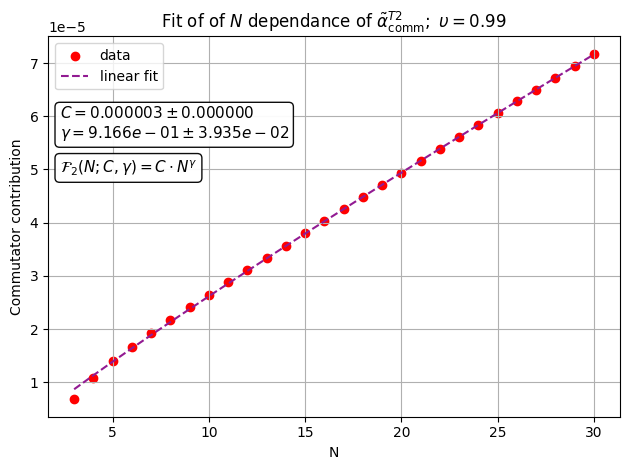

In [4]:
peak = 0.99
vals_triang = np.array([commutator_contributions_triang[f"{N},{peak}"] for N in values_N])

errors = (np.max(vals_triang) - np.min(vals_triang)) * 1e-1 / 2

def power_law(x, C, gamma):
    return C * x**gamma

idx = 0 # use data points from value N = 3+idx for the linear fit
values_N_masked    = values_N[idx:]
vals_triang_masked = vals_triang[idx:]

ls_obj = LeastSquares(values_N_masked, vals_triang_masked, errors, power_law)
m_obj = Minuit(ls_obj, C=1, gamma=1)
m_obj.limits["C"] = (0, None)
m_obj.migrad()
m_obj.hesse()

x_fit = np.linspace(min(values_N), max(values_N), 300)

C, gamma = m_obj.values["C"], m_obj.values["gamma"]
err_C, err_gamma = m_obj.errors["C"], m_obj.errors["gamma"]
y_line = power_law(x_fit, C, gamma)

plt.scatter(values_N, vals_triang, color="red", label="data")

# Line fit plot
plt.plot(x_fit[idx:], y_line[idx:], "--", color="#921A92", label="linear fit")
plt.gca().text(
    0.02, 0.82,
    rf"$C = {C:.6f} \pm {err_C:.6f}$" "\n"
    rf"$\gamma = {gamma:.3e} \pm {err_gamma:.3e}$",
    transform=plt.gca().transAxes,
    fontsize=11,
    va="top",
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", alpha=0.95),
)

plt.gca().text(
    0.02, 0.68,
    r"$\mathcal{F}_2(N; C, \gamma)=C\cdot N^\gamma$",
    transform=plt.gca().transAxes,
    fontsize=11,
    va="top",
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", alpha=0.95),
)

plt.xlabel("N")
plt.ylabel("Commutator contribution")
plt.title(r"Fit of of $N$ dependance of $\tilde{\alpha}_\text{comm}^{T2};$ $\upsilon=$"+f"{peak}")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

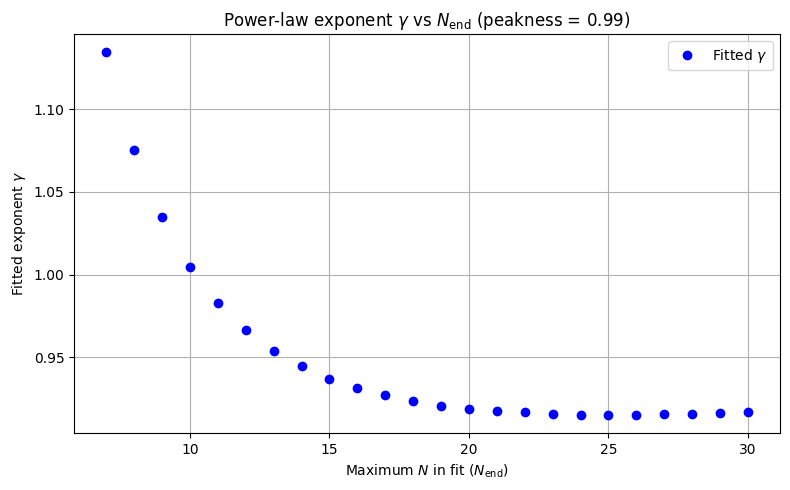

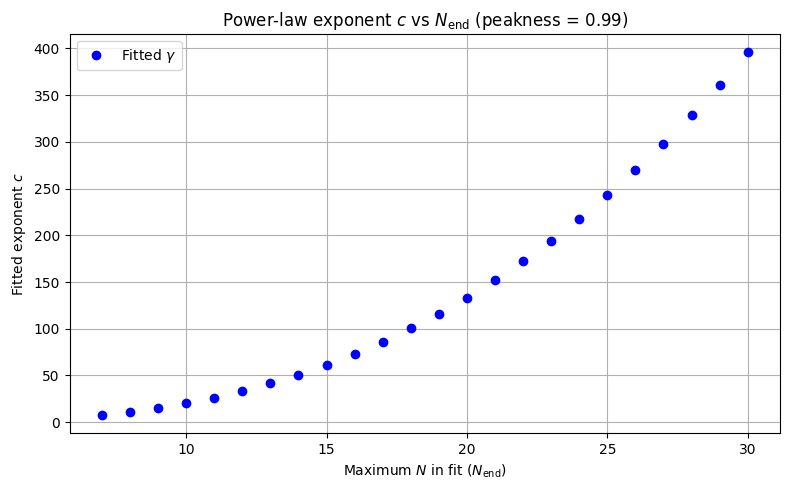

In [5]:
def power_law(x, C, gamma):
        return C * x**gamma   

def line(x, M, Q):
    return M*x + Q
      
peak = 0.99
gamma_vals = []
c_vals = []

MIN_POINTS = 5 # minimum size of data set

for final_N in range(N_START + MIN_POINTS - 1, N_END + 1):

    valsN_power_fit = np.arange(N_START, final_N + 1)

    vals_triang_power_fit = np.array([commutator_contributions_triang[f"{N},{peak}"] for N in valsN_power_fit])

    errors = (np.max(vals_triang_power_fit) - np.min(vals_triang_power_fit)) * 1e-1 / 2

    def power_law_corrected(x, C, gamma):
        return (36 * (1-peak)**3 / (valsN_power_fit.mean())**3) * C * x**gamma   

    ls_obj = LeastSquares(valsN_power_fit, vals_triang_power_fit, errors, power_law_corrected)
    m_obj = Minuit(ls_obj, C=1, gamma=1)
    m_obj.limits["C"] = (0, None)
    m_obj.limits["gamma"] = (0, None)
    m_obj.migrad()
    m_obj.hesse()

    gamma_vals.append([m_obj.values["gamma"], m_obj.errors["gamma"]])
    c_vals.append([m_obj.values["C"], m_obj.errors["C"]])

gamma_vals = np.array(gamma_vals)
c_vals = np.array(c_vals)

N_ends = np.arange(N_START + MIN_POINTS - 1, N_END + 1)

plt.figure(figsize=(8,5))
plt.plot(N_ends, gamma_vals[:, 0], "o", color='blue', label=r'Fitted $\gamma$')
plt.xlabel(r"Maximum $N$ in fit ($N_\text{end}$)")
plt.ylabel(r"Fitted exponent $\gamma$")
plt.title(r"Power-law exponent $\gamma$ vs $N_\text{end}$ "f"(peakness = {peak})")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
plt.plot(N_ends, c_vals[:, 0], "o", color='blue', label=r'Fitted $\gamma$')
plt.xlabel(r"Maximum $N$ in fit ($N_\text{end}$)")
plt.ylabel(r"Fitted exponent $c$")
plt.title(r"Power-law exponent $c$ vs $N_\text{end}$ "f"(peakness = {peak})")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### Fit $N$ of full additive (from (3.3.27))

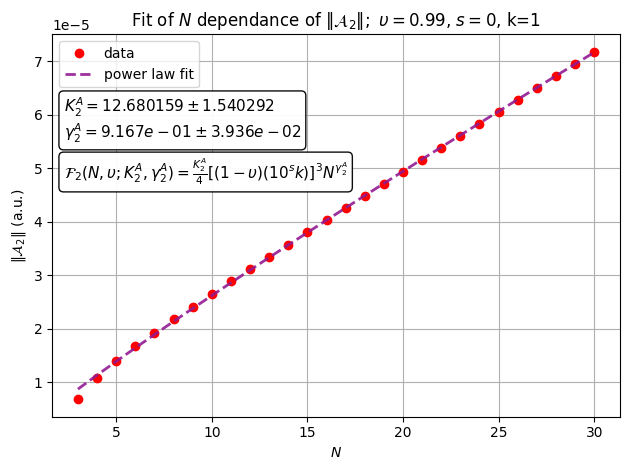

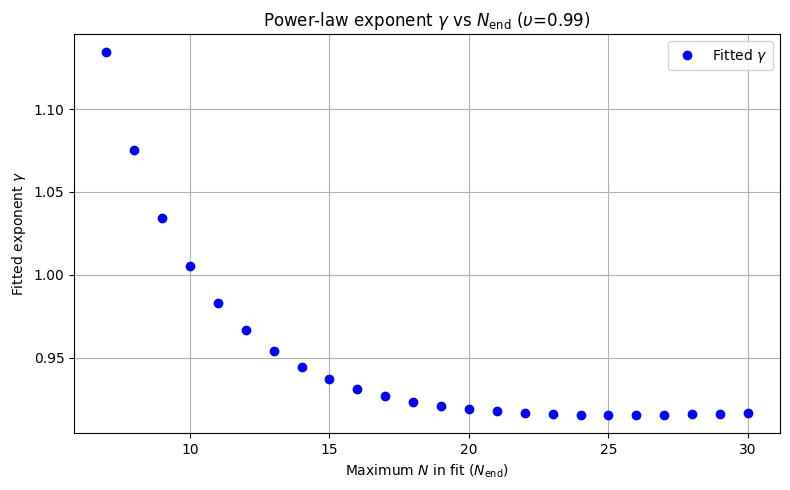

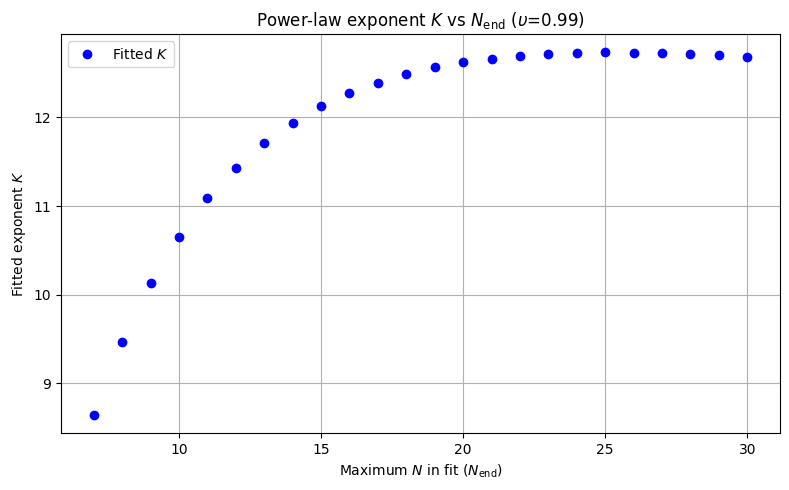

In [6]:
peak = 0.99
s = 0 # scale factor
k_step = 1 # can be just set to 1 (for now)
dt = 10**s * k_step

vals_triang = np.array([commutator_contributions_triang[f"{N},{peak}"]*(dt**2) for N in values_N])
errors = (np.max(vals_triang) - np.min(vals_triang)) * 1e-1 / 2

idx = 0
values_N_masked = values_N[idx:]
vals_triang_masked = vals_triang[idx:]

def power_law_corrected(x, K, gamma):
    return ((1 - peak)**3 * (dt)**3) * K * x**gamma / 4 

m = Minuit(
    LeastSquares(values_N_masked, vals_triang_masked, errors, power_law_corrected),
    K=0.5, gamma=0.5
)
m.limits["K"] = (0, None)
m.migrad()
m.hesse()

x_fit = np.linspace(values_N.min(), values_N.max(), 300)
K, gamma = m.values["K"], m.values["gamma"]
err_K, err_gamma = m.errors["K"], m.errors["gamma"]
y_fit = power_law_corrected(x_fit, K, gamma)

fig, ax = plt.subplots()

ax.plot(values_N, vals_triang, "o", color="red", label="data")
ax.plot(x_fit[idx:], y_fit[idx:], "--", color="#921A92", linewidth=2, alpha=0.9, label="power law fit")

ax.text(
    0.02, 0.84,
    rf"$K_2^A = {K:.6f} \pm {err_K:.6f}$" "\n"
    rf"$\gamma_2^A = {gamma:.3e} \pm {err_gamma:.3e}$",
    transform=ax.transAxes,
    fontsize=11,
    va="top",
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", alpha=0.95),
)

ax.text(
    0.02, 0.68,
    r"$\mathcal{F}_2(N, \upsilon; K_2^A, \gamma_2^A)=\frac{K_2^A}{4}\left[(1-\upsilon)(10^s k)\right]^3 N^{\gamma_2^A}$",
    transform=ax.transAxes,
    fontsize=11,
    va="top",
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", alpha=0.95),
)

ax.set_xlabel(r"$N$")
ax.set_ylabel(r"$\|\mathcal{A}_2\|$ (a.u.)")
ax.set_title(r"Fit of $N$ dependance of $\|\mathcal{A}_2\|;$ $\upsilon=$"+f"{peak}, "+"$s=$"+f"{s}, "+"k="f"{k_step}")
ax.legend()
ax.grid()
fig.tight_layout()

fig.savefig(r"C:\Users\edori\Desktop\Nexus\Università\Current\MasterThesis\Images\imgs_additive\additive_vs_N_T2.pdf")
plt.show()

# ----------------------------------------------------------------------------------------------------------------------------------------------------

gamma_vals = []
K_vals = []

MIN_POINTS = 5

for final_N in range(N_START + MIN_POINTS - 1, N_END + 1):
    valsN_power_fit = np.arange(N_START, final_N + 1)
    vals_triang_power_fit = np.array([commutator_contributions_triang[f"{N},{peak}"]*(dt**2) for N in valsN_power_fit])
    errors = (np.max(vals_triang_power_fit) - np.min(vals_triang_power_fit)) * 1e-1 / 2

    m = Minuit(
        LeastSquares(valsN_power_fit, vals_triang_power_fit, errors, power_law_corrected),
        K=1, gamma=1
    )
    m.limits["K"] = (0, None)
    m.limits["gamma"] = (0, None)
    m.migrad()
    m.hesse()

    gamma_vals.append([m.values["gamma"], m.errors["gamma"]])
    K_vals.append([m.values["K"], m.errors["K"]])

gamma_vals = np.array(gamma_vals)
c_vals = np.array(K_vals)
N_ends = np.arange(N_START + MIN_POINTS - 1, N_END + 1)

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(N_ends, gamma_vals[:, 0], "o", color="blue", label=r"Fitted $\gamma$")
ax.set_xlabel(r"Maximum $N$ in fit ($N_\text{end}$)")
ax.set_ylabel(r"Fitted exponent $\gamma$")
ax.set_title(r"Power-law exponent $\gamma$ vs $N_\text{end}$ ($\upsilon$=" + f"{peak})")
ax.grid(True)
ax.legend()
fig.tight_layout()
fig.savefig(r"C:\Users\edori\Desktop\Nexus\Università\Current\MasterThesis\Images\imgs_additive\additive_gamma_vs_Nend_T2.pdf")
plt.show()

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(N_ends, c_vals[:, 0], "o", color="blue", label=r"Fitted $K$")
ax.set_xlabel(r"Maximum $N$ in fit ($N_\text{end}$)")
ax.set_ylabel(r"Fitted exponent $K$")
ax.set_title(r"Power-law exponent $K$ vs $N_\text{end}$ ($\upsilon$=" + f"{peak})")
ax.grid(True)
ax.legend()
fig.tight_layout()
fig.savefig(r"C:\Users\edori\Desktop\Nexus\Università\Current\MasterThesis\Images\imgs_additive\additive_K_vs_Nend_T2.pdf")
plt.show()

### Fit of $t$ dependance of additive Trotter

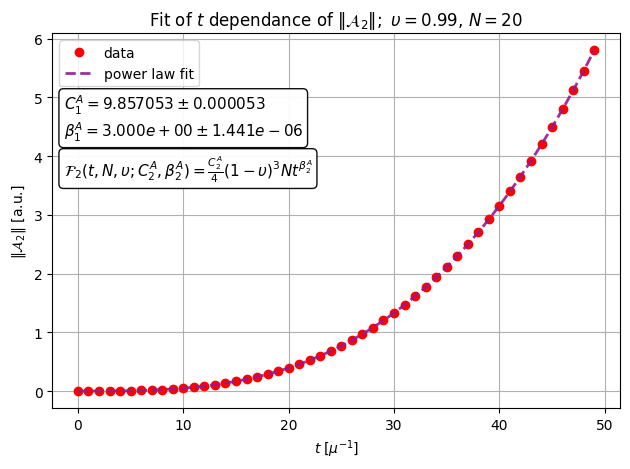

In [9]:
peak = 0.99
N = 20
dt_list = np.arange(0,50)

vals_additive = np.array([commutator_contributions_triang[f"{N},{peak}"]*(dt**3) for dt in dt_list])
errors = (np.max(vals_triang) - np.min(vals_triang)) * 1e-1 / 2

idx = 0
values_dt_masked = dt_list[idx:]
vals_triang_masked = vals_triang[idx:]

def model_t_fit(x, C, beta):
    return ((1 - peak)**3 * N) / 4 * C * x**beta

m = Minuit(
    LeastSquares(values_dt_masked, vals_additive, errors, model_t_fit),
    C=0.5, beta=0.5
)
m.limits["C"] = (0, None)
m.migrad()
m.hesse()

x_fit = np.linspace(dt_list.min(), dt_list.max(), 300)
C, beta = m.values["C"], m.values["beta"]
err_C, err_beta = m.errors["C"], m.errors["beta"]
y_fit = model_t_fit(x_fit, C, beta)

fig, ax = plt.subplots()

ax.plot(dt_list, vals_additive, "o", color="red", label="data")
ax.plot(x_fit[idx:], y_fit[idx:], "--", color="#921A92", linewidth=2, alpha=0.9, label="power law fit")

ax.text(
    0.02, 0.84,
    rf"$C_1^A = {C:.6f} \pm {err_C:.6f}$" "\n"
    rf"$\beta_1^A = {beta:.3e} \pm {err_beta:.3e}$",
    transform=ax.transAxes,
    fontsize=11,
    va="top",
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", alpha=0.95),
)

ax.text(
    0.02, 0.68,
    r"$\mathcal{F}_2(t, N, \upsilon; C_2^A, \beta_2^A)=\frac{C_2^A}{4}(1-\upsilon)^3 N t^{\beta_2^A}$",
    transform=ax.transAxes,
    fontsize=11,
    va="top",
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", alpha=0.95),
)

ax.set_xlabel(r"$t\;[\mu^{-1}]$")
ax.set_ylabel(r"$\|\mathcal{A}_2\|$ [a.u.]")
ax.set_title(r"Fit of $t$ dependance of $\|\mathcal{A}_2\|;$ $\upsilon=$"+f"{peak}, "+"$N=$"+f"{N}")
ax.legend()
ax.grid()
fig.tight_layout()

fig.savefig(r"C:\Users\edori\Desktop\Nexus\Università\Current\MasterThesis\Images\imgs_additive\additive_vs_t_T2.pdf")
plt.show()